<a href="https://colab.research.google.com/github/Osstrinha/SQL-projects/blob/main/GlobalVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import sqlite3 # SQL environment for Python 3
import pandas as pd
# Libraries for plotting purposes
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Loading data
accounts = pd.read_json("/accounts_anonymized.json")
support_cases = pd.read_json("/support_cases_anonymized.json")


(accounts.info())  # Visualizing


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415 entries, 0 to 1414
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   account_sfid          1415 non-null   object
 1   account_name          1415 non-null   object
 2   account_created_date  1415 non-null   object
 3   account_country       1408 non-null   object
 4   account_industry      1402 non-null   object
dtypes: object(5)
memory usage: 55.4+ KB


In [5]:
(support_cases.info())  # Visualizing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   case_sfid          10000 non-null  object
 1   account_sfid       8407 non-null   object
 2   case_number        10000 non-null  int64 
 3   case_contact_name  10000 non-null  object
 4   case_product       10000 non-null  object
 5   case_status        10000 non-null  object
 6   case_resolution    10000 non-null  object
 7   case_details       10000 non-null  object
 8   case_closure       10000 non-null  object
 9   case_priority      10000 non-null  object
 10  case_severity      10000 non-null  object
 11  case_reason        10000 non-null  object
 12  case_type          10000 non-null  object
 13  case_category      10000 non-null  object
 14  case_created_date  10000 non-null  object
 15  case_closed_date   9058 non-null   object
dtypes: int64(1), object(15)
memory usage: 1.2

In [71]:
# Criar conexão com o banco SQLite em memória
conn = sqlite3.connect(":memory:")

# Salvar os dataframes como tabelas no banco
accounts.to_sql("accounts", conn, index=False, if_exists="replace")
support_cases.to_sql("support_cases", conn, index=False, if_exists="replace")

print("Tabelas carregadas com sucesso!")

Tabelas carregadas com sucesso!


In [72]:
# Creating the query
query_text = """
CREATE TEMP VIEW IF NOT EXISTS joined_data_initial AS
SELECT
    a.*,
    b.*
FROM support_cases a
LEFT JOIN accounts b
ON a.account_sfid = b.account_sfid;
"""

conn.execute(query_text)

query = pd.read_sql_query("SELECT * FROM joined_data_initial", conn) # Selecting from the view

query.head() # Verifying the query

,case_sfid,account_sfid,case_number,case_contact_name,case_product,case_status,case_resolution,case_details,case_closure,case_priority,...,case_reason,case_type,case_category,case_created_date,case_closed_date,account_sfid:1,account_name,account_created_date,account_country,account_industry
0,c9f05bc582a8abec4c5f1a9385c24a96d86d3f3093c557...,58912bf7e5131400adbc1c1521158b7b8cc2f2f3fbd51f...,69908,Contact_e2737240,Verify Enterprise,Closed,Done,Trial,Undefined,Normal,...,Other,License Activation,Licensing,2025-01-09,2025-01-09,58912bf7e5131400adbc1c1521158b7b8cc2f2f3fbd51f...,Customer_e3a65d64,2007-11-19 21:27:35,United States,Pharmaceuticals
1,a8f7c39a437d713e800599205d6cd9319733fd5df18af8...,3675a0565672bccecbba8a8a102b0482f3c82e6f07443e...,69887,Contact_20439d47,GVD Perpetual,Closed,Done,Trial,Undefined,Normal,...,Other,License Activation,Licensing,2025-01-09,2025-01-09,3675a0565672bccecbba8a8a102b0482f3c82e6f07443e...,Customer_3b04264f,2024-03-18 16:59:36,China,Pharmaceuticals
2,654dd0c826e0842cdd030e935aa1e886787cb990b693c2...,58912bf7e5131400adbc1c1521158b7b8cc2f2f3fbd51f...,69910,Contact_edf7784e,Verify Enterprise,Closed,Done,Trial,Undefined,Normal,...,Other,License Activation,Licensing,2025-01-09,2025-01-09,58912bf7e5131400adbc1c1521158b7b8cc2f2f3fbd51f...,Customer_e3a65d64,2007-11-19 21:27:35,United States,Pharmaceuticals
3,57422ac55031dd6c7acf36a2bc6d74e01e0c0194c61318...,908d42c9a4e3f4beae8bf394dd2ed82090a219cdf64518...,69905,Contact_6f59abbf,Verify,Closed,Done,Full,Undefined,Normal,...,Other,License Activation,Licensing,2025-01-09,2025-01-09,908d42c9a4e3f4beae8bf394dd2ed82090a219cdf64518...,Customer_806c92e7,2013-07-08 11:35:22,United Kingdom,Pharmaceuticals
4,b88c12d55a7c468c96e48a7693e306e24f44947f5f1e3f...,None,69891,Contact_f02dfb7d,Other,New,Undefined,Undefined,Undefined,Normal,...,Other,Undefined,Undefined,2025-01-09,None,None,None,None,None,None


In [73]:
# Creating querys to identify the distinct possibilities from each column

# Get distinct case types
query_text_types = """
SELECT

DISTINCT case_type


FROM joined_data_initial
"""

# Get distinct case priorities
query_text_priorities = """
SELECT

DISTINCT case_priority

FROM joined_data_initial
"""
query_priorities = pd.read_sql_query(query_text_priorities, conn)

# Get distinct products associated with cases
query_text_products = """
SELECT

DISTINCT case_product

FROM joined_data_initial
"""

query_types = pd.read_sql_query(query_text_types, conn)
query_products = pd.read_sql_query(query_text_products, conn)
query_priorities = pd.read_sql_query(query_text_priorities, conn)


# Print all results

#print("Distinct Case Types:")
#print(query_types.head(30))

print("\nDistinct Case Priorities:")
print(query_priorities.head(5))

#print("\nDistinct Case Products:")
#print(query_products.head(80))



Distinct Case Priorities:
  case_priority
0        Normal
1  not_priority
2        Urgent
3          High


In [74]:
# Eliminating duplicate ID or non-associated account call
query_create_view = """
CREATE TEMP VIEW IF NOT EXISTS joined_data AS
SELECT *
FROM joined_data_initial
WHERE account_sfid IS NOT NULL
AND account_sfid != 'None';
"""

# Execute the query to create the temp view
conn.execute(query_create_view)


query = pd.read_sql_query("SELECT * FROM joined_data", conn) # Selecting from the view

query.head(10) # Verifying the query

,case_sfid,account_sfid,case_number,case_contact_name,case_product,case_status,case_resolution,case_details,case_closure,case_priority,...,case_reason,case_type,case_category,case_created_date,case_closed_date,account_sfid:1,account_name,account_created_date,account_country,account_industry
0,c9f05bc582a8abec4c5f1a9385c24a96d86d3f3093c557...,58912bf7e5131400adbc1c1521158b7b8cc2f2f3fbd51f...,69908,Contact_e2737240,Verify Enterprise,Closed,Done,Trial,Undefined,Normal,...,Other,License Activation,Licensing,2025-01-09,2025-01-09,58912bf7e5131400adbc1c1521158b7b8cc2f2f3fbd51f...,Customer_e3a65d64,2007-11-19 21:27:35,United States,Pharmaceuticals
1,a8f7c39a437d713e800599205d6cd9319733fd5df18af8...,3675a0565672bccecbba8a8a102b0482f3c82e6f07443e...,69887,Contact_20439d47,GVD Perpetual,Closed,Done,Trial,Undefined,Normal,...,Other,License Activation,Licensing,2025-01-09,2025-01-09,3675a0565672bccecbba8a8a102b0482f3c82e6f07443e...,Customer_3b04264f,2024-03-18 16:59:36,China,Pharmaceuticals
2,654dd0c826e0842cdd030e935aa1e886787cb990b693c2...,58912bf7e5131400adbc1c1521158b7b8cc2f2f3fbd51f...,69910,Contact_edf7784e,Verify Enterprise,Closed,Done,Trial,Undefined,Normal,...,Other,License Activation,Licensing,2025-01-09,2025-01-09,58912bf7e5131400adbc1c1521158b7b8cc2f2f3fbd51f...,Customer_e3a65d64,2007-11-19 21:27:35,United States,Pharmaceuticals
3,57422ac55031dd6c7acf36a2bc6d74e01e0c0194c61318...,908d42c9a4e3f4beae8bf394dd2ed82090a219cdf64518...,69905,Contact_6f59abbf,Verify,Closed,Done,Full,Undefined,Normal,...,Other,License Activation,Licensing,2025-01-09,2025-01-09,908d42c9a4e3f4beae8bf394dd2ed82090a219cdf64518...,Customer_806c92e7,2013-07-08 11:35:22,United Kingdom,Pharmaceuticals
4,7201ca1fa40a8466c801b9428fad499c979561e2e8463f...,1a07fea194096dc37843674e6441e749bf468e63d673f3...,69896,Contact_cb9c5d58,Verify Enterprise,Closed,Done,Full,Undefined,Normal,...,Other,License Activation,Licensing,2025-01-09,2025-01-09,1a07fea194096dc37843674e6441e749bf468e63d673f3...,Customer_33406333,2013-04-22 18:21:53,Slovenia,Other
5,452d9ec220bcb52e820a48a2a8535a419c29b4e1d42135...,0380781d3a99edbc49d3555a2024159036d381df74ea4d...,69886,Contact_20439d47,GVD Perpetual,Closed,Done,Trial,Undefined,Normal,...,Other,License Activation,Licensing,2025-01-09,2025-01-09,0380781d3a99edbc49d3555a2024159036d381df74ea4d...,Customer_f5e42d64,2024-04-26 20:56:13,China,Printing
6,75845c31b97410dfb371627fdda20175578d49ae3cd70a...,a6b6a3deac72bfbd98608d35a5c4d165e05ff0a89debb2...,69898,Contact_aac2679e,Verify,Waiting On Customer,Undefined,Module Affected: Spelling,Undefined,Normal,...,Other,Software Performance,Software,2025-01-09,None,a6b6a3deac72bfbd98608d35a5c4d165e05ff0a89debb2...,Customer_5eb51762,2012-07-26 20:56:29,United States,Advertising & Branding Agency
7,9278b437c3cfe1453d11c242f23c70001c89fda3d0848d...,881d50808a6255889c8c32ea836f95024472b3d7a9864b...,69894,Contact_96687ae9,Verify,Waiting On Customer,Undefined,Module Affected: Spelling,Undefined,not_priority,...,Other,Software Performance,Software,2025-01-09,None,881d50808a6255889c8c32ea836f95024472b3d7a9864b...,Customer_e87ae47c,2019-12-06 14:12:58,United States,Advertising & Branding Agency
8,70d204c2670dd66f2a9b32b7cfaea4ebdbb280e923aa70...,e2034e1ad9c5af91540260ae9eb6b937ed877a74b6b76f...,69890,Contact_e904e325,Digital Platform,Closed,Done,Other,Undefined,Normal,...,Other,Software Question,Software,2025-01-09,2025-01-09,e2034e1ad9c5af91540260ae9eb6b937ed877a74b6b76f...,Customer_4f96f4bc,2021-10-12 13:02:07,China,Information Technology
9,e455855357df4279a8c5e565439a275e1ef9bfac047a31...,941abcb3948063f92f5a784bc1aceb3020423ba28ca939...,69895,Contact_e00625cd,Not a Support Case,Closed,Undefined,Undefined,Undefined,Normal,...,Other,Undefined,Undefined,2025-01-09,2025-01-09,941abcb3948063f92f5a784bc1aceb3020423ba28ca939...,Customer_922d000b,2020-02-28 19:57:05,Poland,Household & Personal Products


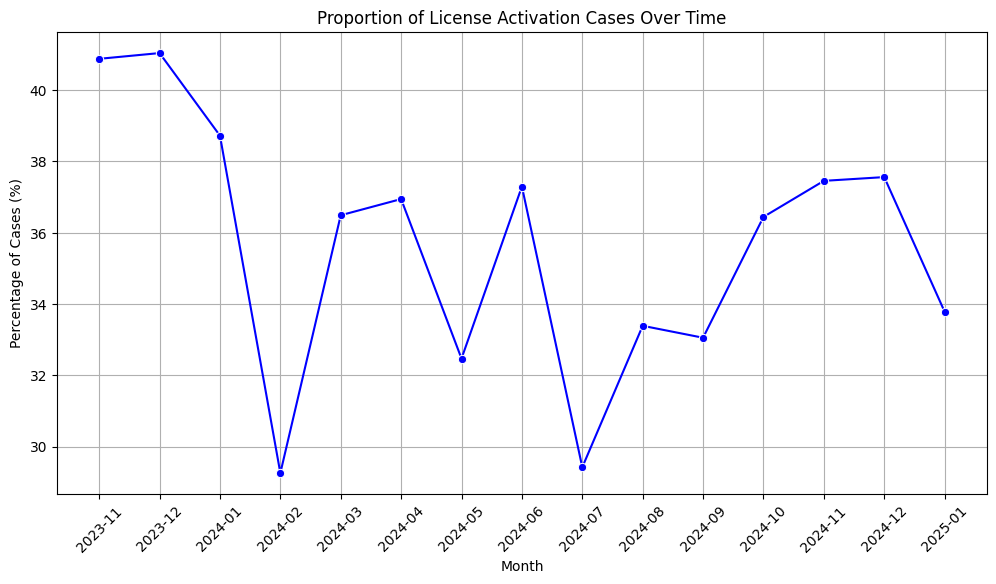

In [75]:
# Helps identify the impact of 'License Activation' among the cases
query_tefinho = """
WITH a AS (
    SELECT
        STRFTIME('%Y-%m', DATE(case_created_date)) AS date_created,
        COUNT(case_sfid) AS total_type
    FROM joined_data
    WHERE case_type = 'License Activation'
    GROUP BY date_created
),
b AS (
    SELECT
        STRFTIME('%Y-%m', DATE(case_created_date)) AS date_created,
        COUNT(case_sfid) AS total_date
    FROM joined_data
    GROUP BY date_created
)
SELECT
    a.date_created,
--    a.total_type,
--    b.total_date,
    CAST(a.total_type AS REAL) * 100 / b.total_date AS proportion
FROM a
JOIN b ON a.date_created = b.date_created
"""

query_tefinho = pd.read_sql_query(query_tefinho, conn) # Selecting from the view

#query_tefinho.head(50) # Verifying the query

# Plotting the proportion of 'License Activation' cases per month
plt.figure(figsize=(12,6))
sns.lineplot(x='date_created', y='proportion', data=query_tefinho, marker='o', color='blue')
plt.title('Proportion of License Activation Cases Over Time')
plt.xlabel('Month')
plt.ylabel('Percentage of Cases (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

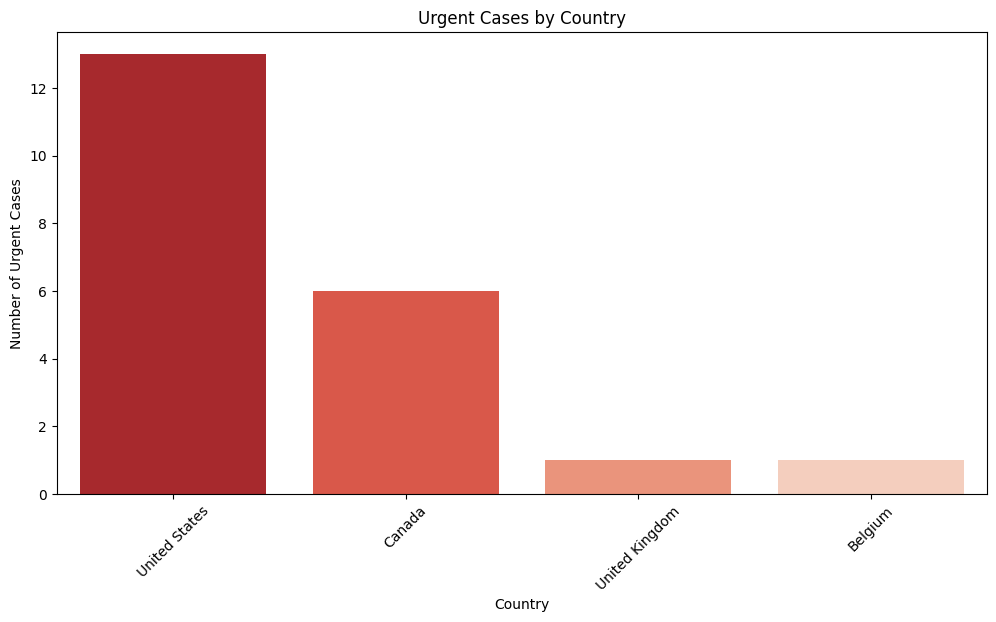

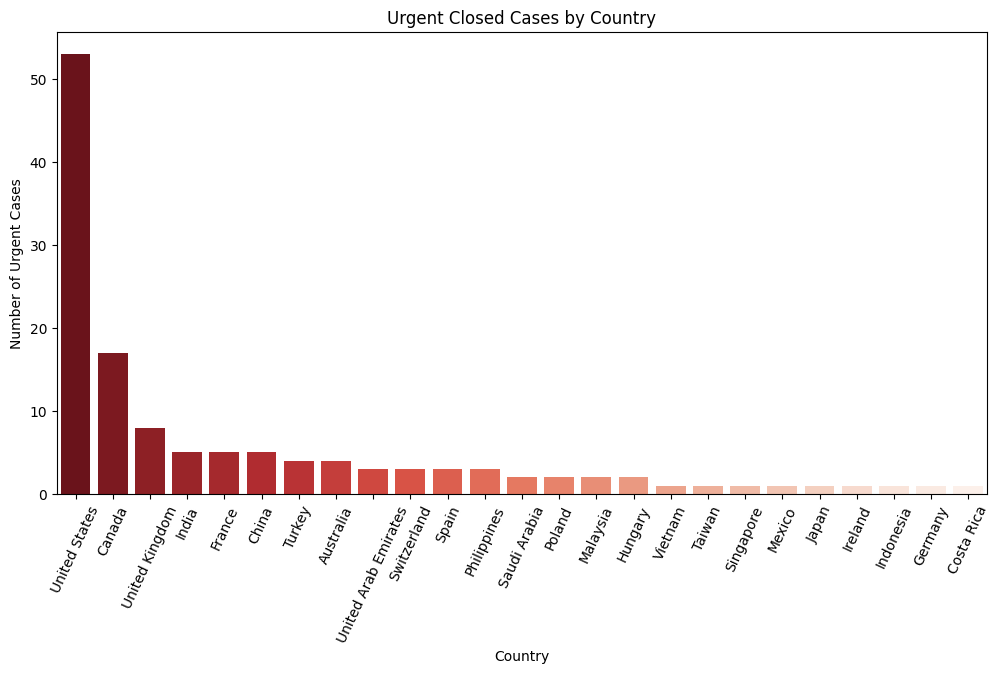

In [76]:
# Identifies where urgent issues are concentrated

query_urgent_countrys = """
SELECT
    account_country,
    COUNT(case_sfid) AS total_cases
FROM joined_data
WHERE case_priority = 'Urgent'
AND case_status != 'Closed'
GROUP BY account_country
ORDER BY total_cases DESC


"""

query_urgent_countrys = pd.read_sql_query(query_urgent_countrys, conn) # Selecting from the view

query_urgent_countrys_closed = """
SELECT
    account_country,
    COUNT(case_sfid) AS total_cases
FROM joined_data
WHERE case_priority = 'Urgent'
AND case_status = 'Closed'
GROUP BY account_country
ORDER BY total_cases DESC


"""

query_urgent_countrys_closed = pd.read_sql_query(query_urgent_countrys_closed, conn) # Selecting from the view

#query_urgent_countrys.head(50) # Verifying the query

plt.figure(figsize=(12,6))
sns.barplot(x='account_country', y='total_cases', hue='account_country', data=query_urgent_countrys, palette='Reds_r', legend=False)
plt.title('Urgent Cases by Country')
plt.xlabel('Country')
plt.ylabel('Number of Urgent Cases')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x='account_country', y='total_cases', hue='account_country', data=query_urgent_countrys_closed, palette='Reds_r', legend=False)
plt.title('Urgent Closed Cases by Country')
plt.xlabel('Country')
plt.ylabel('Number of Urgent Cases')
plt.xticks(rotation=65)
plt.show()



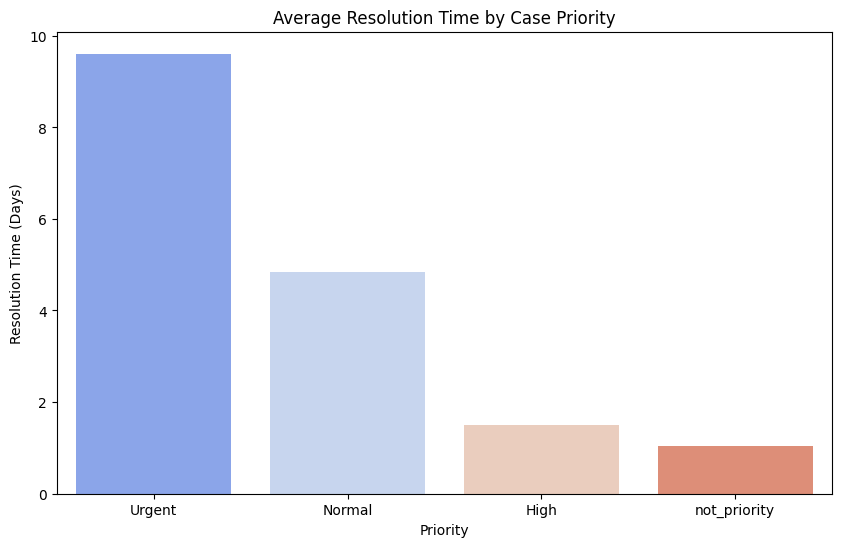

In [53]:
# Average resolution time by priority

query_time_resolution = """

SELECT
    case_priority,
    AVG(JULIANDAY(case_closed_date) - JULIANDAY(case_created_date)) AS avg_resolution_time
FROM joined_data
WHERE case_closed_date IS NOT NULL
GROUP BY case_priority
ORDER BY avg_resolution_time DESC


"""

query_time_resolution = pd.read_sql_query(query_time_resolution, conn) # Selecting from the view

#query_time_resolution.head(50) # Verifying the query

plt.figure(figsize=(10,6))
sns.barplot(x='case_priority', y='avg_resolution_time', hue='case_priority', data=query_time_resolution, palette='coolwarm', legend=False)
plt.title('Average Resolution Time by Case Priority')
plt.xlabel('Priority')
plt.ylabel('Resolution Time (Days)')
plt.show()

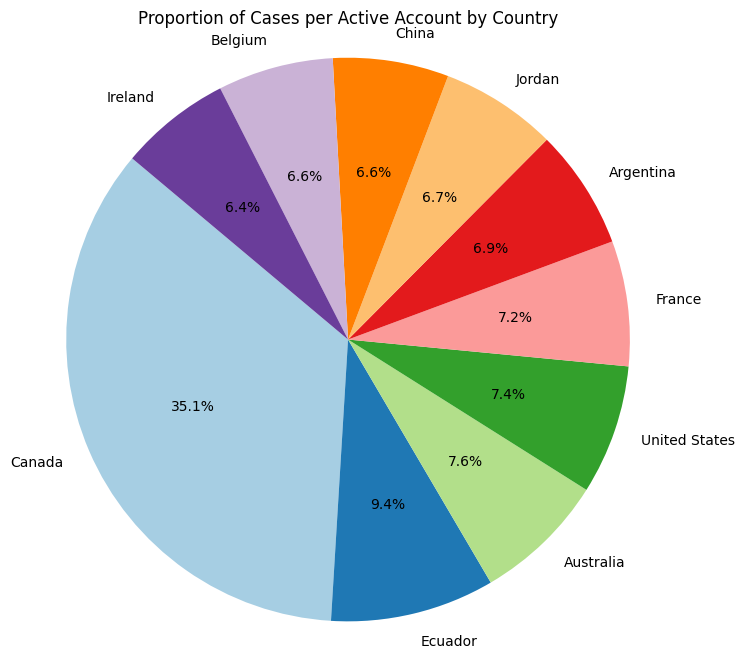

In [66]:
# Countries with most cases per active account

query_country_propor = """
SELECT
    account_country,
    COUNT(case_sfid) * 1.0 / COUNT(DISTINCT account_sfid) AS cases_per_account
FROM joined_data
WHERE account_country IS NOT NULL
GROUP BY account_country
ORDER BY cases_per_account DESC


"""

query_country_propor = pd.read_sql_query(query_country_propor, conn) # Selecting from the view

#query_country_propor.head(50) # Verifying the query


# Limiting to top 10 countries to avoid clutter
df_top_countries = query_country_propor.nlargest(10, 'cases_per_account')

# Creating a pie chart
plt.figure(figsize=(8,8))
plt.pie(df_top_countries['cases_per_account'], labels=df_top_countries['account_country'],
        autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title('Proportion of Cases per Active Account by Country')
plt.axis('equal')  # Ensures pie is drawn as a circle
plt.show()


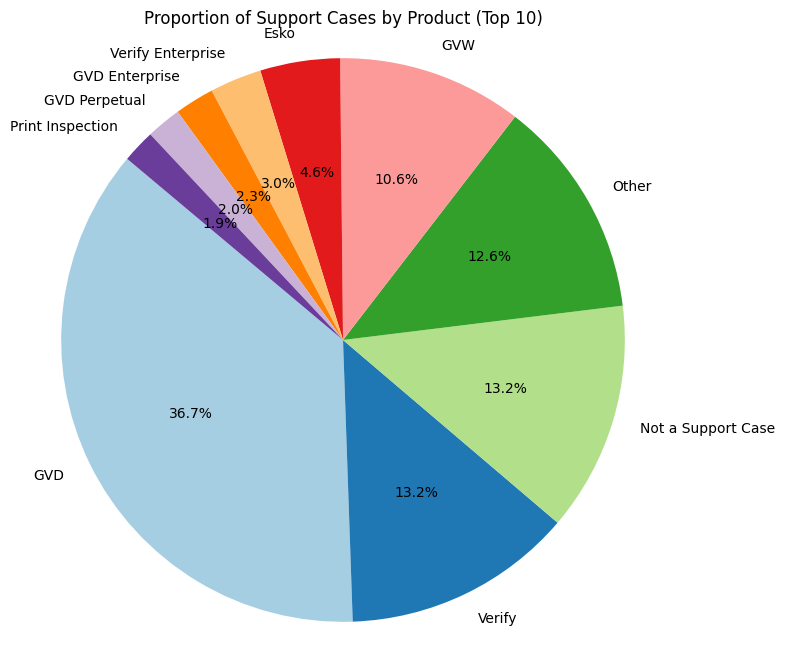

In [67]:
# Products with the Most Support Cases

query_product_propor = """
SELECT
    case_product,
    COUNT(case_sfid) AS total_cases
FROM joined_data
GROUP BY case_product
ORDER BY total_cases DESC


"""

query_product_propor = pd.read_sql_query(query_product_propor, conn) # Selecting from the view

#query_product_propor.head(50) # Verifying the query

## Global Vision Desktop (GVD) is an application that automates the control of graphic files to detect changes or errors, even during printing


# Limiting to top 10 products to avoid clutter
df_top_products = query_product_propor.nlargest(10, 'total_cases')

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_top_products['total_cases'], labels=df_top_products['case_product'],
        autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title('Proportion of Support Cases by Product (Top 10)')
plt.axis('equal')  # Ensures pie is drawn as a circle
plt.show()



**Key Insights from the Data and Visualizations**

1️⃣ License Activation Issues Are a Significant Portion of Support Cases

The License Activation case type consistently represents a high proportion of all cases.
This suggests that customers are frequently experiencing issues activating their licenses.

2️⃣ Certain Countries Have a High Concentration of Urgent Cases

The pie chart for urgent cases by country reveals that a few countries generate the majority of critical support cases.
These countries may have regional-specific issues, poor documentation, or a lack of technical support.

3️⃣ High-Priority Cases Have a Long Average Resolution Time

The bar chart for resolution time by priority shows that even high-priority cases take a significant time to resolve.
This suggests inefficiencies in the support team's workflow or possible bottlenecks in problem resolution.

4️⃣ Certain Products Generate the Most Support Cases

The pie chart for cases by product highlights that a few products are responsible for a large percentage of support cases.

5️⃣ Some Countries Have Disproportionately High Support Cases per Active Account

The cases per account by country analysis shows that some countries have a higher-than-average number of cases per customer.
This suggests product adaptation issues, regional infrastructure problems, or gaps in localized support.

**Two Actionable Recommendations for the Business**

1️⃣ Implement a License Activation Improvement Plan

🔹 **Why**? License Activation is a recurring issue and represents a large proportion of total cases. The tendency is to replicate the same pattern as was in 2024, decreasing over february and increasing after.

🔹 Action:

*   Create step-by-step video guides or interactive tutorials to assist users.

*   Implement automated troubleshooting before customers need to contact support.

*   Work with the product team to simplify the activation process.

*   Perhaps, if feasible, implement a chatbot in GVD (the most used interface).

2️⃣ Reduce Resolution Time for Urgent Cases in High-Impact Region

🔹 **Why**? The data shows that Urgent cases take longer than expected to be resolved, especially in certain countries. Delayed urgent cases can harm customer satisfaction and business operations.

🔹 Action:

*   Reallocate Support Resources → Assign dedicated teams to handle urgent cases in high-impact regions.

*   Implement AI-Powered Triage → Automate case categorization and escalate truly urgent cases faster.

*   Enhance Localized Support → Provide regional troubleshooting guides and self-service options to reduce repetitive tickets.

*   Monitor & Enforce SLAs → Track urgent case resolution times per region and agent to optimize workflows.